In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Customers.csv',
 'Customers.xlsx',
 'Demand_forecast.csv',
 'growth_azure_synapse.ipynb',
 'Pain_points_and_feedback.csv',
 'peer_feedback_udacity.png',
 'Product_business_review.csv',
 'TM_WORLD_BORDERS-0.3',
 'TM_WORLD_BORDERS_SIMPL-0.3',
 'unleashing_storage_growth.docx',
 'World_Regions.lpk']

In [3]:
customers = pd.read_csv('Customers.csv')

In [4]:
demand = pd.read_csv('Demand_forecast.csv')

In [5]:
customers.rename(columns = {'Customer name': 'customer_name', 'Geo region': 'geo_region', 'Current usage (TB)':'current_usage_TB',
       'Industry/vertical':'industry', 'Common requirement': 'common_requirement', 'Internal/External': 'internal_external'}, inplace = True)

In [6]:
demand.rename(columns = {'Customer name': 'customer_name', 'Geo region': 'geo_region',
 'Total addressable market - 12 mo (TB)': 'total_12mo_mkt_TB', 
 'Unnamed: 3':'u_3','Unnamed: 4':'u_4', 'Unnamed: 5':'u_5', 
 'Unnamed: 6': 'u_6', 'Unnamed: 7': 'u_7' }, inplace = True)

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_name       209 non-null    object 
 1   geo_region          209 non-null    object 
 2   current_usage_TB    209 non-null    float64
 3   industry            209 non-null    object 
 4   common_requirement  209 non-null    object 
 5   internal_external   209 non-null    object 
dtypes: float64(1), object(5)
memory usage: 9.9+ KB


In [8]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_name      209 non-null    object 
 1   geo_region         209 non-null    object 
 2   total_12mo_mkt_TB  209 non-null    float64
 3   u_3                0 non-null      float64
 4   u_4                1 non-null      object 
 5   u_5                3 non-null      object 
 6   u_6                3 non-null      object 
 7   u_7                3 non-null      object 
dtypes: float64(2), object(6)
memory usage: 13.2+ KB


In [9]:
demand.drop(['u_3', 'u_4', 'u_5', 'u_6', 'u_7'], axis = 1, inplace = True)

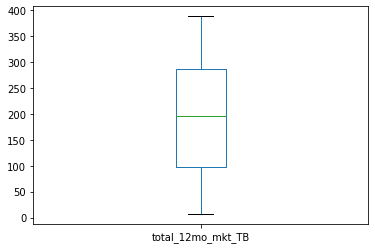

In [10]:
demand.total_12mo_mkt_TB.plot(kind = 'box');

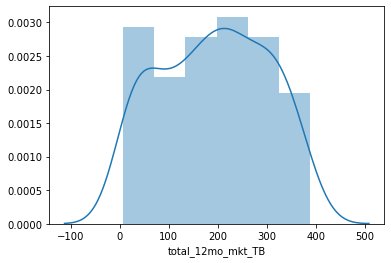

In [11]:
sns.distplot(demand.total_12mo_mkt_TB);

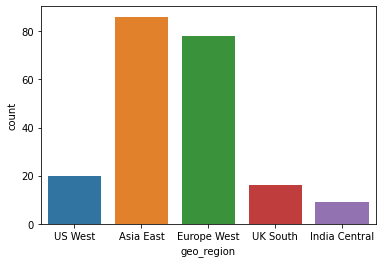

In [12]:
sns.countplot(data = customers, x = 'geo_region');

In [13]:
customers.describe()

,current_usage_TB
count,209.000000
mean,0.956938
std,0.566606
min,0.020607
25%,0.466866
50%,0.911269
75%,1.435944
max,1.931608


In [14]:
demand.describe()

,total_12mo_mkt_TB
count,209.000000
mean,191.387560
std,109.191364
min,6.789910
25%,97.912583
50%,196.200639
75%,286.706760
max,388.493976


In [23]:
industries = pd.api.types.CategoricalDtype(ordered = True, categories = list(customers.industry.unique()))
customers['industry'] = customers['industry'].astype(industries)

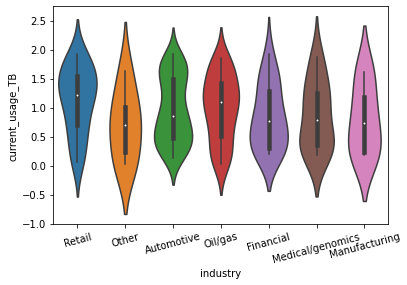

In [24]:
sns.violinplot(data = customers, x = 'industry', y = 'current_usage_TB')
plt.xticks(rotation = 15);

In [25]:
geo = pd.api.types.CategoricalDtype(ordered = True, categories = list(customers.geo_region.unique()))
customers['geo_region'] = customers['geo_region'].astype(geo)

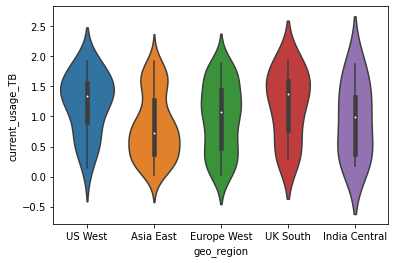

In [26]:
sns.violinplot(data = customers, x = 'geo_region', y = 'current_usage_TB');

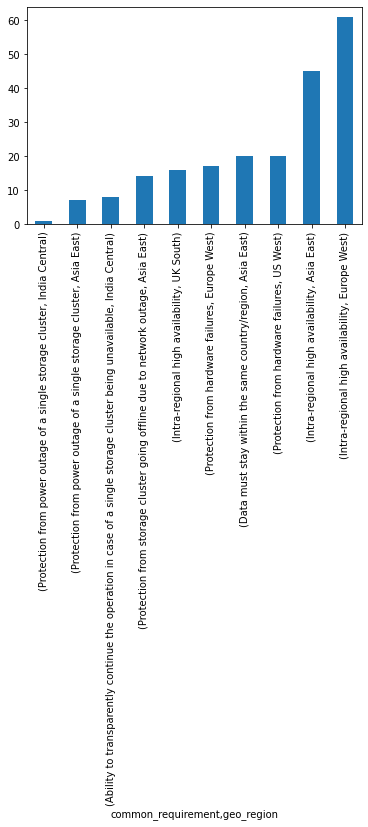

In [17]:
customers.groupby(['common_requirement','geo_region'])['geo_region'].count().sort_values().plot(kind = 'bar');

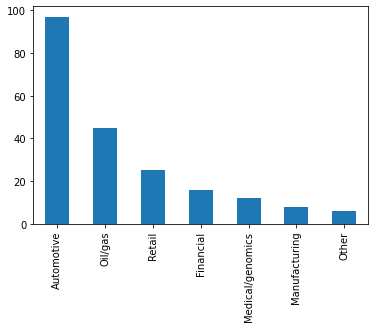

In [18]:
customers['industry'].value_counts().plot(kind = 'bar');

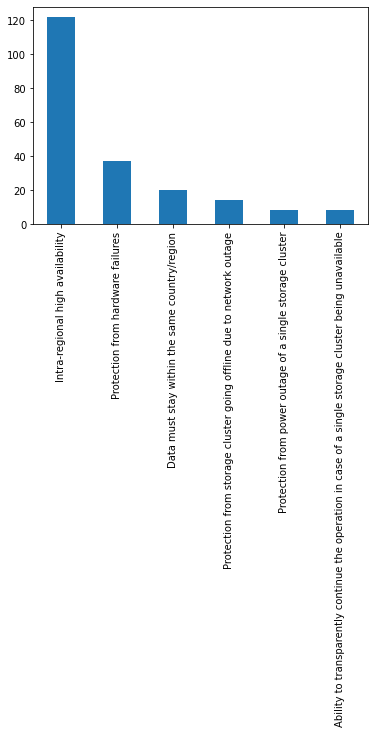

In [19]:
customers.common_requirement.value_counts().plot(kind = 'bar');

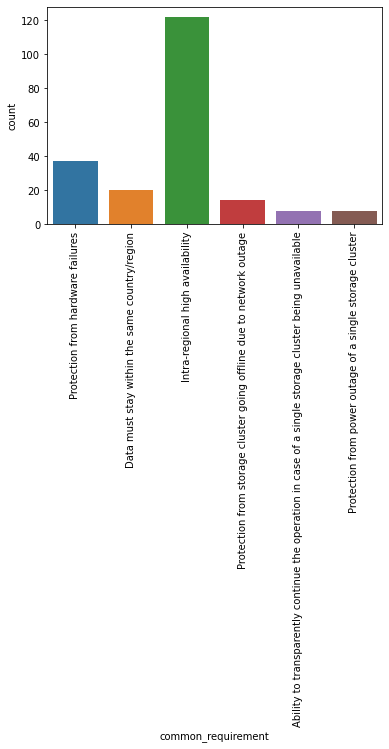

In [20]:
sns.countplot(customers.common_requirement)
plt.xticks(rotation = 90);

In [28]:
demand.set_index('customer_name', inplace = True)

In [29]:
customers.set_index('customer_name', inplace = True)

In [30]:
cus_data = customers.join(demand, lsuffix='_customers', rsuffix='_demand')

In [31]:
feedback = pd.read_csv('Pain_points_and_feedback.csv')

In [32]:
feedback.rename(columns = {'Customer name': 'customer_name', 'Common feedback/painpoint 1': 'feed_1', 'Common feedback/painpoint 2': 'feed_2', 'Common feedback/painpoint 3': 'feed_3' }, inplace = True)

In [33]:
feedback.set_index('customer_name', inplace = True)

In [34]:
data = cus_data.join(feedback)

In [35]:
to_avoid = data[data.feed_1.isnull()]

In [36]:
to_explore = data[data.feed_1.notnull()]

In [66]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

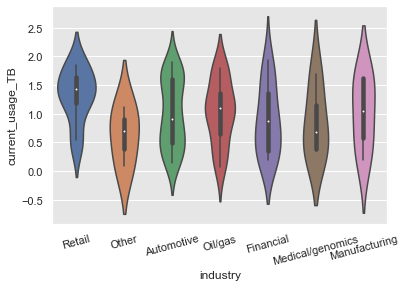

In [67]:
to_explore.loc[:,'industry'] = to_explore['industry'].astype(industries)
sns.violinplot(data = to_explore, x = 'industry', y = 'current_usage_TB')
plt.xticks(rotation = 15);

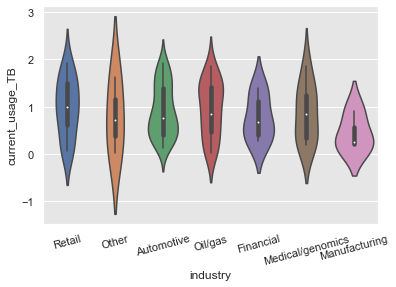

In [68]:
to_avoid.loc[:,'industry'] = to_avoid['industry'].astype(industries)
sns.violinplot(data = to_avoid, x = 'industry', y = 'current_usage_TB')
plt.xticks(rotation = 15);

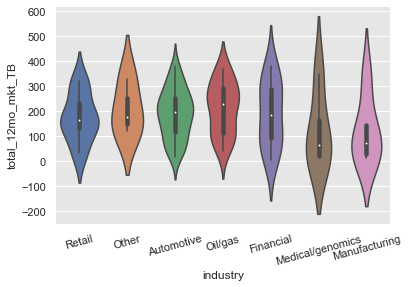

In [69]:
sns.violinplot(data = to_explore, x = 'industry', y = 'total_12mo_mkt_TB')
plt.xticks(rotation = 15);

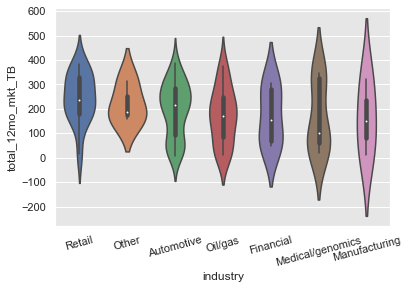

In [70]:
sns.violinplot(data = to_avoid, x = 'industry', y = 'total_12mo_mkt_TB')
plt.xticks(rotation = 15);

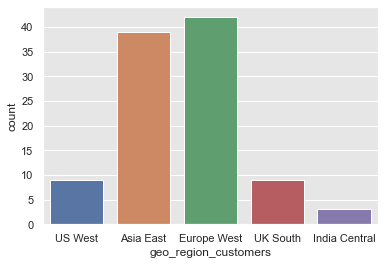

In [75]:
to_explore.loc[:,'geo_region_customers'] = to_explore['geo_region_customers'].astype(geo)
sns.countplot(data = to_explore, x = 'geo_region_customers');

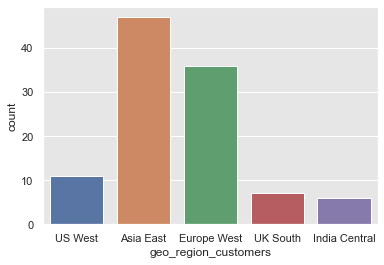

In [76]:
to_avoid.loc[:,'geo_region_customers'] = to_avoid['geo_region_customers'].astype(geo)
sns.countplot(data = to_avoid, x = 'geo_region_customers');

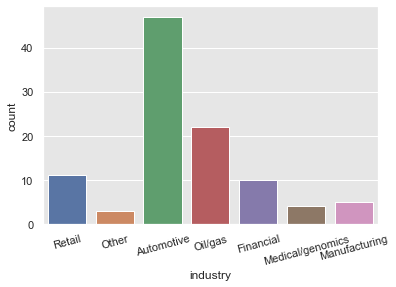

In [77]:
sns.countplot(data = to_explore, x = 'industry')
plt.xticks(rotation = 15);

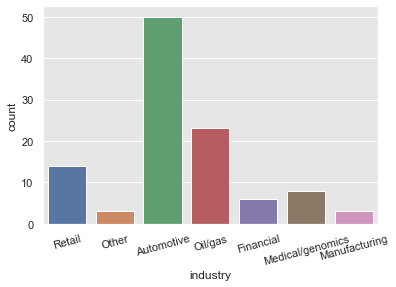

In [78]:
sns.countplot(data = to_avoid, x = 'industry')
plt.xticks(rotation = 15);

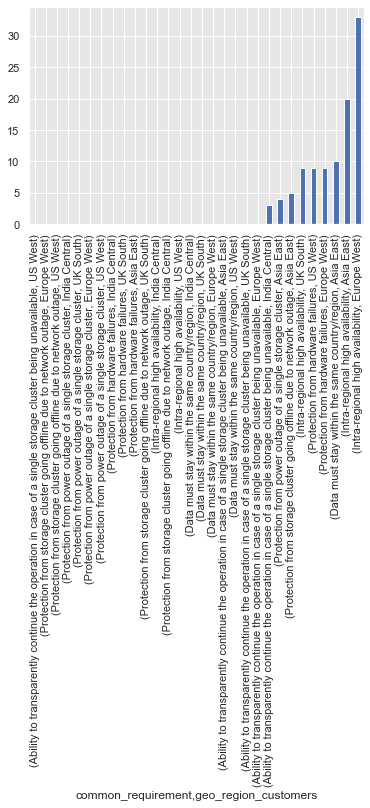

In [79]:
to_explore.groupby(['common_requirement','geo_region_customers'])['geo_region_customers'].count().sort_values().plot(kind = 'bar');

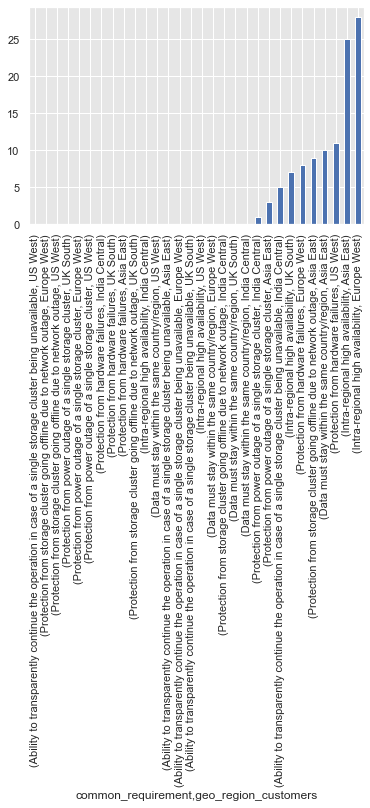

In [82]:
to_avoid.groupby(['common_requirement','geo_region_customers'])['geo_region_customers'].count().sort_values().plot(kind = 'bar');

In [71]:
data.columns

Index(['geo_region_customers', 'current_usage_TB', 'industry',
       'common_requirement', 'internal_external', 'geo_region_demand',
       'total_12mo_mkt_TB', 'feed_1', 'feed_2', 'feed_3'],
      dtype='object')

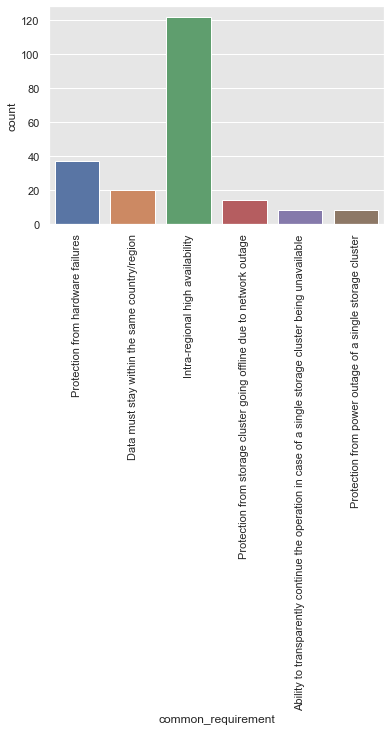

In [74]:
sns.countplot(data.common_requirement)
plt.xticks(rotation = 90);

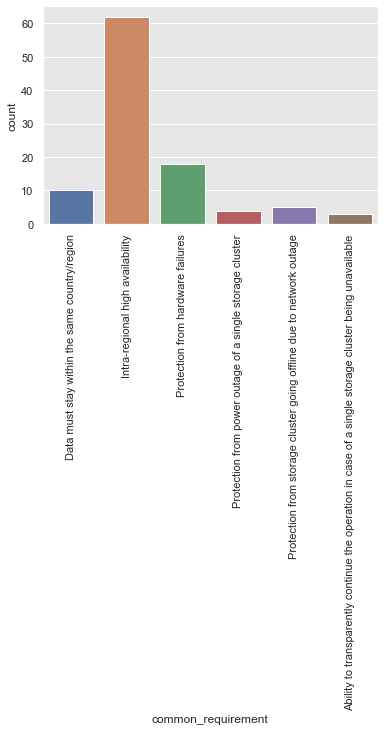

In [80]:
sns.countplot(to_explore.common_requirement)
plt.xticks(rotation = 90);

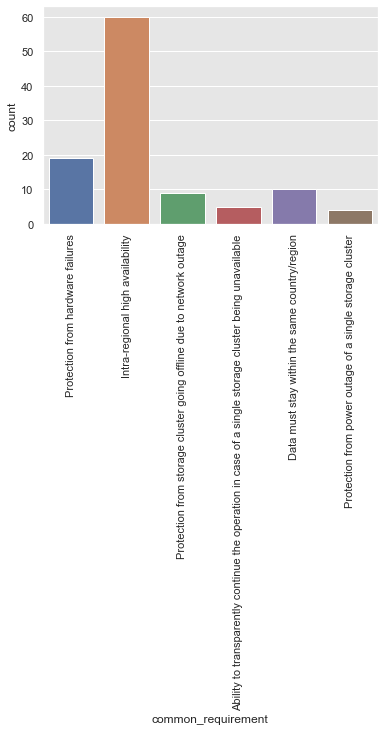

In [81]:
sns.countplot(to_avoid.common_requirement)
plt.xticks(rotation = 90);

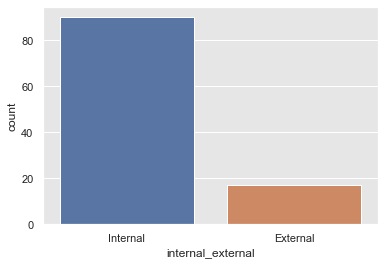

In [84]:
sns.countplot(data = to_avoid, x = 'internal_external');

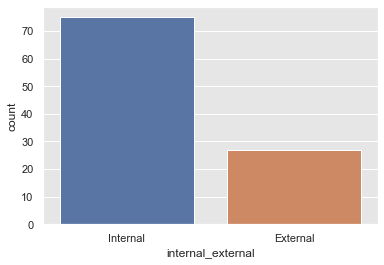

In [85]:
sns.countplot(data = to_explore, x = 'internal_external');